In [6]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Load the housing dataset
housing_df = sns.load_dataset('mpg')


In [8]:
# Display a sample of the dataset
print(housing_df.sample(7))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
81   28.0          4          97.0        92.0    2288          17.0   
215  13.0          8         318.0       150.0    3755          14.0   
61   21.0          4         122.0        86.0    2226          16.5   
139  14.0          8         302.0       140.0    4638          16.0   
216  31.5          4          98.0        68.0    2045          18.5   
171  24.0          4         134.0        96.0    2702          13.5   
100  18.0          6         250.0        88.0    3021          16.5   

     model_year origin                   name  
81           72  japan        datsun 510 (sw)  
215          76    usa             dodge d100  
61           72    usa    ford pinto runabout  
139          74    usa  ford gran torino (sw)  
216          77  japan      honda accord cvcc  
171          75  japan          toyota corona  
100          73    usa          ford maverick  


In [9]:
# Summary statistics
print(housing_df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


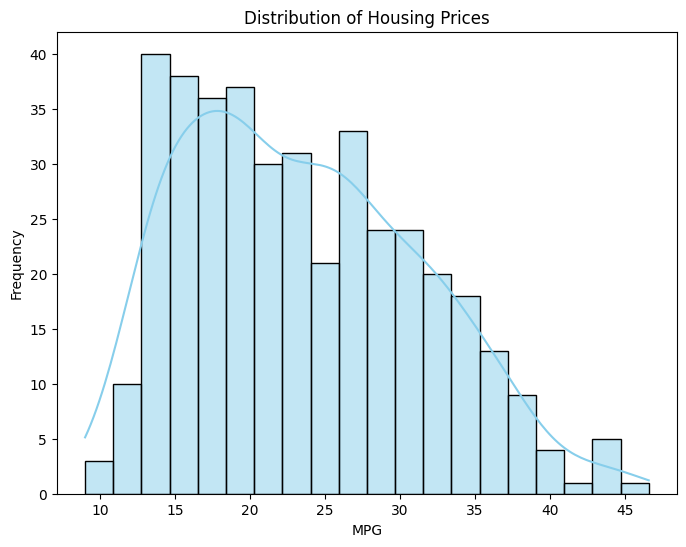

In [10]:
# Histogram of housing prices
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['mpg'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

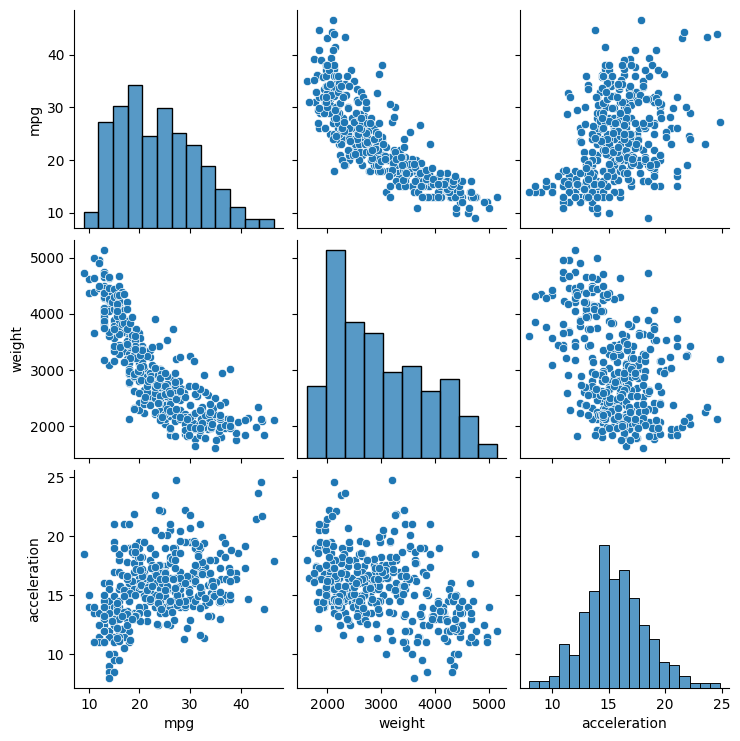

In [11]:
# Scatter plot of numerical features vs. housing prices
sns.pairplot(housing_df, vars=['mpg', 'weight', 'acceleration'])
plt.show()

<ipython-input-12-088f2e9d5249>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_df.corr()


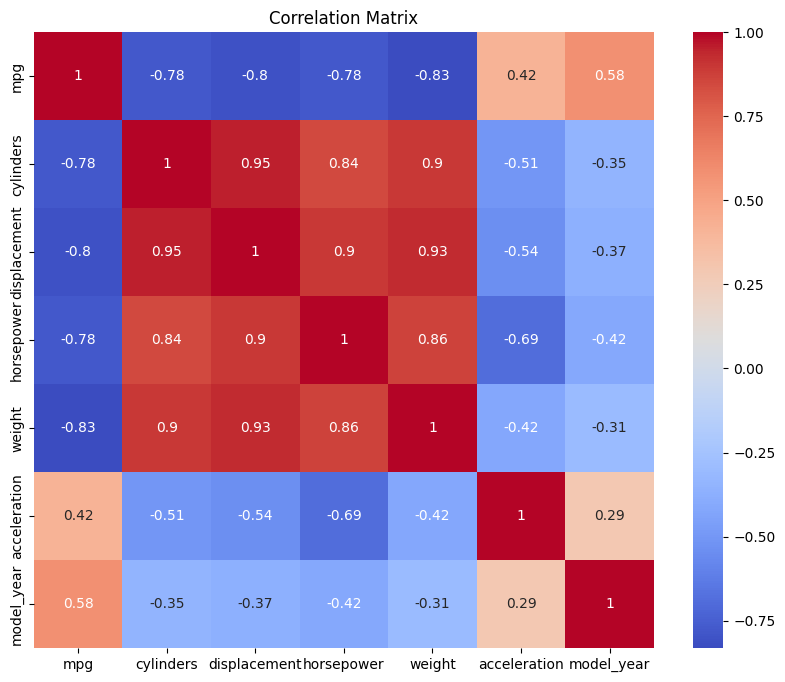

In [12]:
# Correlation matrix
corr_matrix = housing_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Data Preprocessing
# Handling missing values
housing_df.dropna(inplace=True)

In [14]:
X = housing_df[['weight', 'acceleration']]  # Features
y = housing_df['mpg']  # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Squared Error: 17.657298635274234
Mean Absolute Error: 3.4889851944158217
R-squared Score: 0.654053744795711


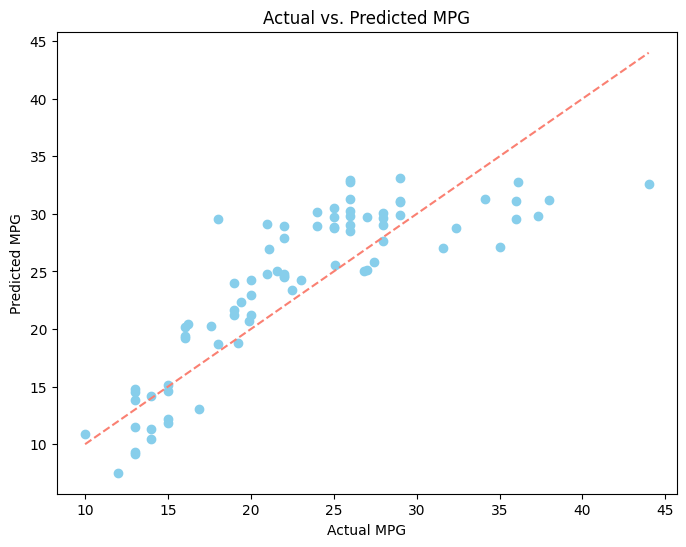

In [20]:
# Visualization of predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='salmon')
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()